## Overfitting

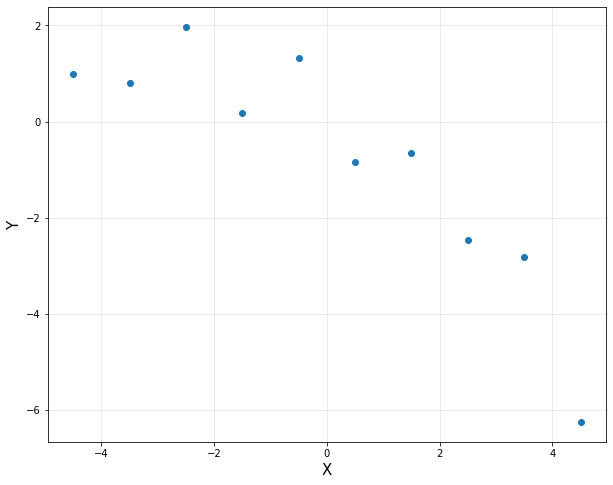

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

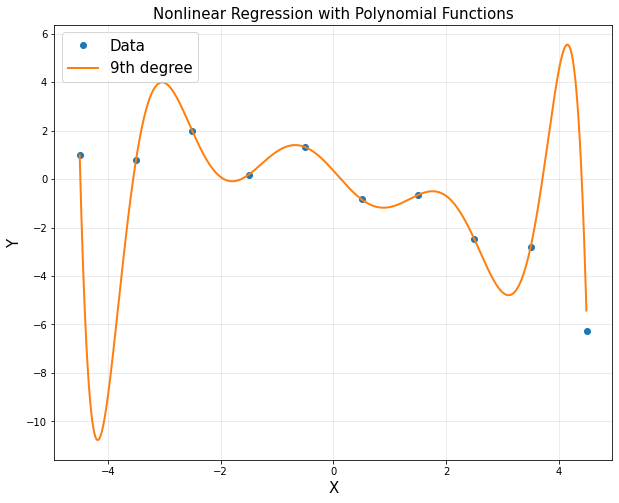

In [4]:
A = np.hstack([x**i for i in range(10)])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
#print(theta)

# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

polybasis = np.hstack([xp**i for i in range(10)])
polybasis = np.asmatrix(polybasis)

yp = polybasis*theta

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp[:,0], yp[:,0], linewidth = 2, label = '9th degree') # 상수항을 제외하고 9차원
plt.title('Nonlinear Regression with Polynomial Functions', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

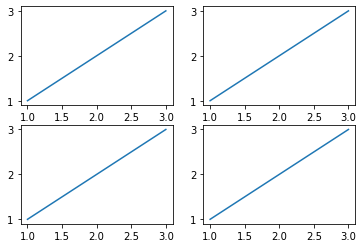

In [11]:
plt.subplot(2,2,1) # for문에서 k를 이용해서 순서를 반복해서출력
plt.plot([1,2,3],[1,2,3])
plt.subplot(2,2,2)
plt.plot([1,2,3],[1,2,3])
plt.subplot(2,2,3)
plt.plot([1,2,3],[1,2,3])
plt.subplot(2,2,4)
plt.plot([1,2,3],[1,2,3])

In [12]:
d = [1, 3, 5, 9]

for i in d:
    print(i)
    
for i in range(4):
    print(d[i])

1
3
5
9
1
3
5
9


In [ ]:
RSS = []
RSS.append([]) # list안에 list가 들어감
RSS.extend(A) # list안에 list가 안들어가게끔

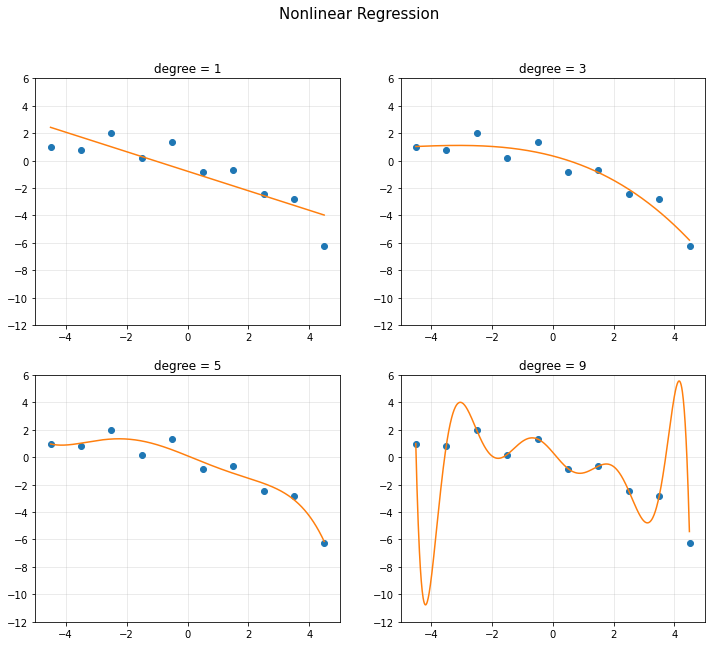

In [15]:
d = [1, 3, 5, 9] # 상수항 제외하고 차원 x의 5승 x의 9승....
RSS = []

plt.figure(figsize = (12, 10))
plt.suptitle('Nonlinear Regression', fontsize = 15)

for k in range(4):
    A = np.hstack([x**i for i in range(d[k]+1)]) #차원이 d에 따라서 결정됨
    polybasis = np.hstack([xp**i for i in range(d[k]+1)])
    
    A = np.asmatrix(A)
    polybasis = np.asmatrix(polybasis) 
    
    theta = (A.T*A).I*A.T*y
    yp = polybasis*theta
    
    RSS.append(np.linalg.norm(y - A*theta, 2)**2)
    # RSS = sum of squares(제곱의 합)
    # y : 실제값
    # A*theta : 예측값
    # 실제값 - 예측값(Error) 거리를 합친 값

    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o')
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)
    
plt.show()

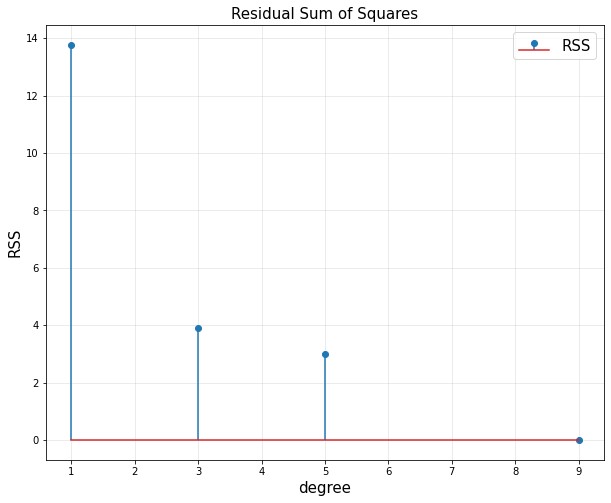

In [16]:
plt.figure(figsize = (10, 8))
plt.stem(d, RSS, label = 'RSS')
plt.title('Residual Sum of Squares', fontsize = 15)
plt.xlabel('degree', fontsize = 15)
plt.ylabel('RSS', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

## Regularization (Shrinkage Methods)

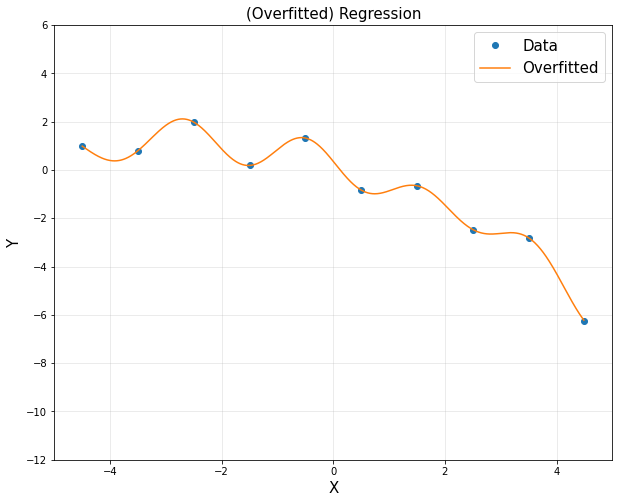

In [24]:
# CVXPY code

import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)
    
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A@theta - y))
prob = cvx.Problem(obj, [])
prob.solve()

yp = rbfbasis * theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

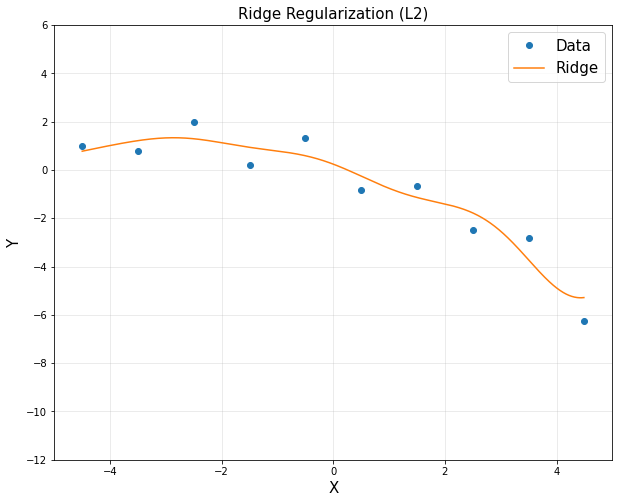

In [34]:
# ridge regression 

lamb = 0.1
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A@theta - y) + lamb * cvx.sum_squares(theta))
prob = cvx.Problem(obj)
prob.solve()

yp = rbfbasis * theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Ridge')
plt.title('Ridge Regularization (L2)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

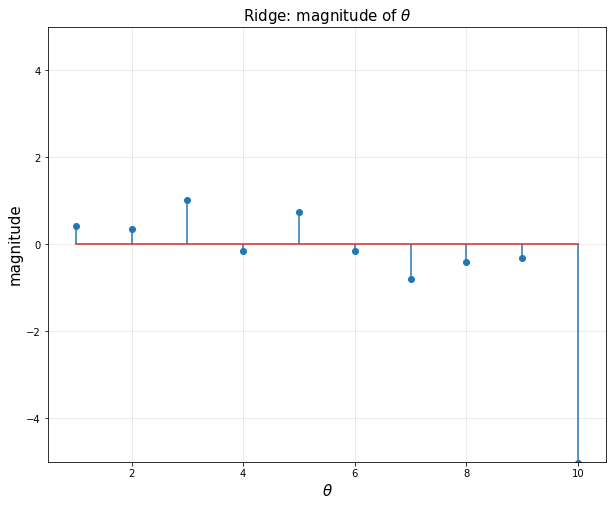

In [35]:
# Regulization (= ridge nonlinear regression) encourages small weights, but not exactly 0

plt.figure(figsize = (10, 8))
plt.title(r'Ridge: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), theta.value)
plt.xlim([0.5, 10.5])
plt.ylim([-5, 5])
plt.grid(alpha = 0.3)
plt.show()

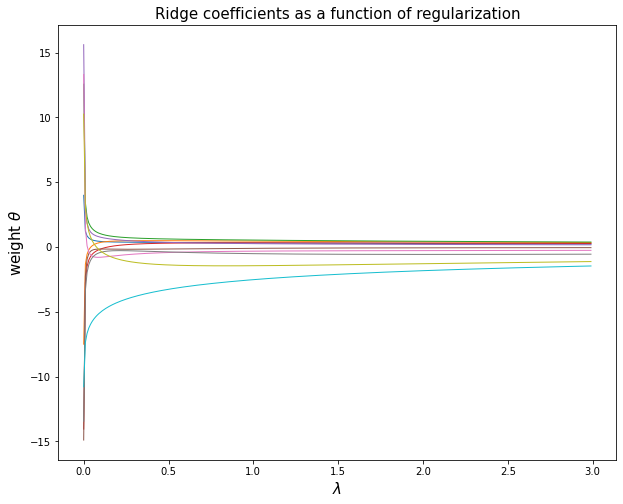

In [36]:
lamb = np.arange(0,3,0.01)

theta_record = []
for k in lamb:
    theta = cvx.Variable([d, 1])
    obj = cvx.Minimize(cvx.sum_squares(A @ theta - y) + k*cvx.sum_squares(theta))
    prob = cvx.Problem(obj).solve()
    theta_record.append(np.ravel(theta.value))

plt.figure(figsize = (10, 8))
plt.plot(lamb, theta_record, linewidth = 1)
plt.title('Ridge coefficients as a function of regularization', fontsize = 15)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel(r'weight $\theta$', fontsize = 15)
plt.show()

## Sparsity for Feature Selection using LASSO

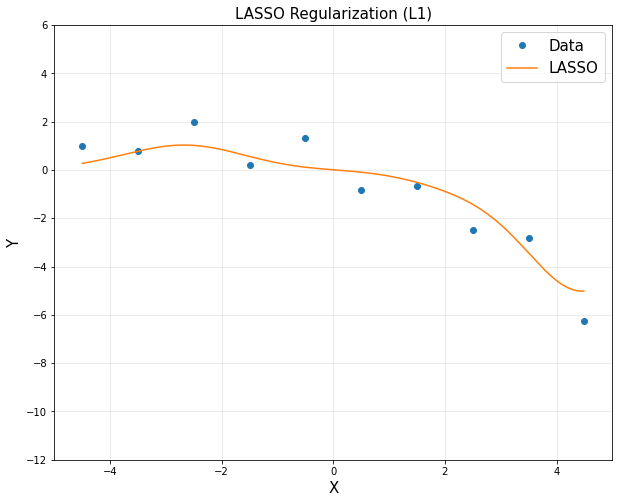

In [41]:
# LASSO regression 

lamb = 2
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A@theta - y) + lamb * cvx.norm(theta, 1))
prob = cvx.Problem(obj)
prob.solve()

yp = rbfbasis * theta.value

plt.figure(figsize = (10, 8))
plt.title('LASSO Regularization (L1)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'LASSO')
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

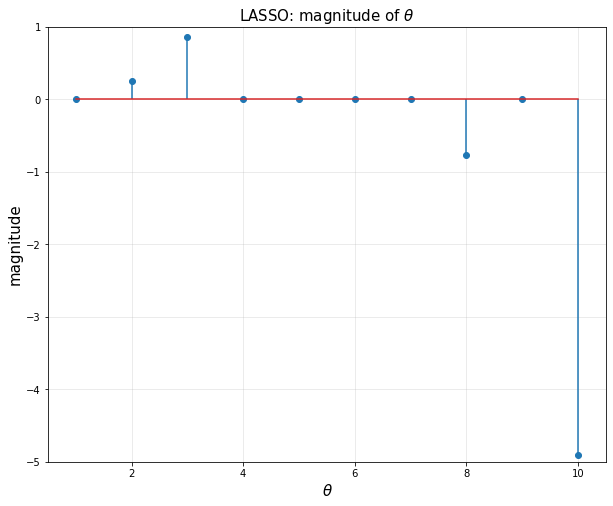

In [42]:
# Regulization (= Lasso nonlinear regression) encourages zero weights

plt.figure(figsize = (10, 8))
plt.title(r'LASSO: magnitude of $\theta$', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 15)
plt.ylabel('magnitude', fontsize = 15)
plt.stem(np.arange(1,11), theta.value)
plt.xlim([0.5, 10.5])
plt.ylim([-5,1])
plt.grid(alpha = 0.3)
plt.show()

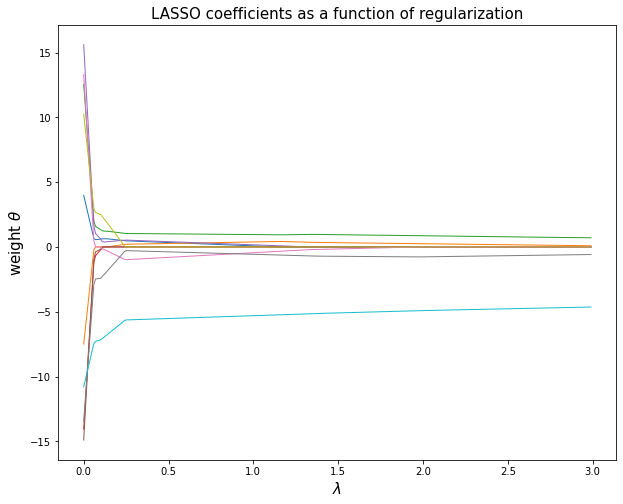

In [43]:
lamb = np.arange(0,3,0.01)

theta_record = []
for k in lamb:
    theta = cvx.Variable([d, 1])
    obj = cvx.Minimize(cvx.sum_squares(A @ theta - y) + k*cvx.norm(theta, 1))
    prob = cvx.Problem(obj).solve()
    theta_record.append(np.ravel(theta.value))

plt.figure(figsize = (10, 8))
plt.plot(lamb, theta_record, linewidth = 1)
plt.title('LASSO coefficients as a function of regularization', fontsize = 15)
plt.xlabel('$\lambda$', fontsize = 15)
plt.ylabel(r'weight $\theta$', fontsize = 15)
plt.show()

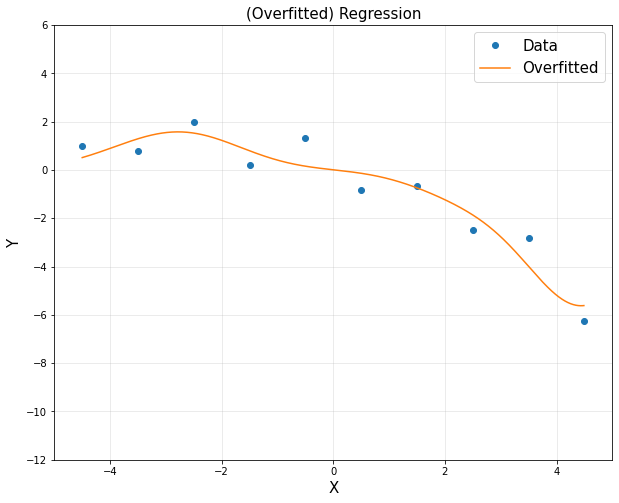

In [44]:
# reduced order model
# we will use only theta 2, 3, 8, 10 

d = 4
u = np.array([-3.5, -2.5, 2.5, 4.5])

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)
    
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.norm(A @ theta - y, 2))
prob = cvx.Problem(obj).solve()

yp = rbfbasis * theta.value

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Overfitted')
plt.title('(Overfitted) Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()